<a href="https://colab.research.google.com/github/gapself/machine-learning-projects/blob/main/algorithms/iris_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The purpose of this excercise is to repeat important knowledge about classification algorithms.

The Iris dataset consists of three classes of iris plants, with four features each:
- sepal length (działka kielicha)
- sepal width,
- petal length,
- and petal width.

image.png

3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

# Logistic Regression - 3-class Classifier

## This code uses the Logistic Regression algorithm from scikit-learn to classify the Iris flowers into three classes (setosa, versicolor, virginica) based on their features.

-

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
#muszę zmapować target_name kwiat1,kwiat2,kwiat3 wg. targetu 0,1,2
print(iris.target_names)
target_names = dict(zip(df.target.unique(),iris.target_names))
print(target_names)
df['target_name'] = df['target'].map(target_names)
df

['setosa' 'versicolor' 'virginica']
{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
df[df.columns[:-1]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.corr()

<ipython-input-176-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


petal length (cm)	and petal width (cm)	have high correlation ~ 0.96 so we can remove any of the two variables. coeff is convenient when we have a lot of features

<ipython-input-191-86504561a18c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".0%") #draws  heatmap with input as the correlation matrix calculted by(df.corr())


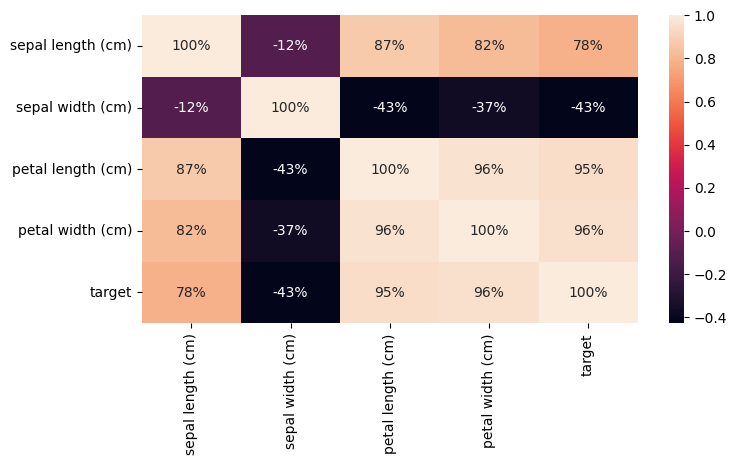

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,fmt=".0%") #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

There are no null or nan values in the datasets.



In [ ]:
df['target_name'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_name, dtype: int64

## Model

In [ ]:
X, y = df[df.columns[:-2]], df.target #or df.drop(columns = ['target_name',['target']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [ ]:
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Make predictions on the test set

In [ ]:
predictions = model.predict(X_test)

## Evaluate the model

In [ ]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  94.73684210526315


In [ ]:
classification_accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, target_names=iris.target_names)
print(report)
print(classification_accuracy)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.86      0.92        14
   virginica       0.89      1.00      0.94        16

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

0.9473684210526315


In [ ]:
print("\nTarget Classes (for 5 first rows):")
print(y_train[:5])
print("\nPredictions (for 5 first rows)")
print(predictions[:5])


Target Classes (for 5 first rows):
126    2
73     1
11     0
37     0
51     1
Name: target, dtype: int64

Predictions (for 5 first rows)
[2 2 2 2 2]


# Decision Trees

## Decision Trees make decisions based on splitting data at each node, creating a tree-like structure.

In [ ]:
from sklearn.tree import DecisionTreeClassifier